In [17]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np
import scipy.stats as st

In [5]:
# Read csv file
plane_data = pd.read_csv('Plane Crashes.csv')

In [3]:
plane_data_df = pd.DataFrame(plane_data)
plane_data_df

,Date,Time,Aircraft,Operator,Registration,Flight phase,Flight type,Survivors,Crash site,Schedule,...,Country,Region,Crew on board,Crew fatalities,Pax on board,PAX fatalities,Other fatalities,Total fatalities,Circumstances,Crash cause
0,1918-05-02,NaN,De Havilland DH.4,United States Signal Corps - USSC,AS-32084,Takeoff (climb),Test,No,Airport (less than 10 km from airport),Dayton - Dayton,...,United States of America,North America,2.0,2.0,0.0,0.0,0.0,2,The single engine airplane departed Dayton-McC...,Technical failure
1,1918-06-08,NaN,Handley Page V/1500,Handley Page Aircraft Company Ltd,E4104,Takeoff (climb),Test,Yes,Airport (less than 10 km from airport),Cricklewood - Cricklewood,...,United Kingdom,Europe,6.0,5.0,0.0,0.0,0.0,5,"Assembled at Cricklewood Airfield in May 1918,...",Technical failure
2,1918-06-11,NaN,Avro 504,Royal Air Force - RAF,A8544,Flight,Training,Yes,"Plain, Valley",Abukir - Abukir,...,Egypt,Africa,2.0,1.0,0.0,0.0,0.0,1,The single engine aircraft was completing a lo...,Unknown
3,1918-06-19,NaN,De Havilland DH.4,United States Signal Corps - USSC,AS-32098,Flight,Military,No,Airport (less than 10 km from airport),Wright Patterson AFB-Wright Patterson AFB,...,United States of America,North America,1.0,1.0,0.0,0.0,0.0,1,"Lt. Frank Stuart Patterson, son and nephew of ...",Technical failure
4,1918-06-24,NaN,Breguet 14,French Air Force - Armée de l'Air,AS-4130,Landing (descent or approach),Military,Yes,NaN,NaN,...,France,Europe,NaN,0.0,NaN,0.0,0.0,0,The aircraft crashed iupon landing somewhere i...,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28531,2022-05-20,NaN,Embraer EMB-110 Bandeirante,Sales Serviços Aéreos,PT-SHN,Landing (descent or approach),Cargo,Yes,Airport (less than 10 km from airport),Jundiaí – Eldorado do Sul,...,Brazil,South America,2.0,0.0,0.0,0.0,0.0,0,The airplane departed Jundiaí on a cargo fligh...,Unknown
28532,2022-05-23,18H 29M 0S,Piper PA-61 Aerostar (Ted Smith 601),Raul Ignacion Posada,N66CG,Flight,Private,No,"Plain, Valley",Celaya - Durango,...,Mexico,Central America,1.0,1.0,1.0,1.0,0.0,2,While approaching Durango Airport on a flight ...,Unknown
28533,2022-05-24,15H 40M 0S,De Havilland DHC-3 Otter,Yakutat Coastal Airlines,N703TH,Landing (descent or approach),Charter/Taxi (Non Scheduled Revenue Flight),Yes,Airport (less than 10 km from airport),Yakutat – Dry Bay,...,United States of America,North America,1.0,0.0,3.0,0.0,0.0,0,The single engine airplane departed Yakutat on...,Unknown
28534,2022-05-29,10H 7M 0S,De Havilland DHC-6 Twin Otter,Tara Air,9N-AET,Flight,Scheduled Revenue Flight,No,Mountains,Pokhara – Jomsom,...,Nepal,Asia,3.0,3.0,19.0,19.0,0.0,22,The twin engine airplane departed Pokhara City...,Human factor


In [7]:
# Find all military values in 'Flight Type' Column
military_flights = plane_data_df['Flight type'].unique().tolist()
print(military_flights)

['Test', 'Training', 'Military', 'Delivery', 'Survey / Patrol / Reconnaissance', 'Postal (mail)', 'Ferry', 'Aerial photography', 'Scheduled Revenue Flight', 'Government', 'Private', 'Charter/Taxi (Non Scheduled Revenue Flight)', nan, 'Cargo', 'Positioning', 'Demonstration', 'Ambulance', 'Executive/Corporate/Business', 'Topographic', 'Geographical / Geophysical / Scientific', 'Cinematography', 'Illegal (smuggling)', 'Spraying (Agricultural)', 'Refuelling', 'Humanitarian', 'Bombing', 'Supply', 'Calibration', 'Meteorological / Weather', 'Fire fighting', 'Skydiving / Paratroopers', 'Aerobatic']


In [9]:
# Dataframe without military accidents
plane_filtered = plane_data_df[plane_data_df['Flight type']!= 'Military']
plane_filtered

,Date,Time,Aircraft,Operator,Registration,Flight phase,Flight type,Survivors,Crash site,Schedule,...,Country,Region,Crew on board,Crew fatalities,Pax on board,PAX fatalities,Other fatalities,Total fatalities,Circumstances,Crash cause
0,1918-05-02,NaN,De Havilland DH.4,United States Signal Corps - USSC,AS-32084,Takeoff (climb),Test,No,Airport (less than 10 km from airport),Dayton - Dayton,...,United States of America,North America,2.0,2.0,0.0,0.0,0.0,2,The single engine airplane departed Dayton-McC...,Technical failure
1,1918-06-08,NaN,Handley Page V/1500,Handley Page Aircraft Company Ltd,E4104,Takeoff (climb),Test,Yes,Airport (less than 10 km from airport),Cricklewood - Cricklewood,...,United Kingdom,Europe,6.0,5.0,0.0,0.0,0.0,5,"Assembled at Cricklewood Airfield in May 1918,...",Technical failure
2,1918-06-11,NaN,Avro 504,Royal Air Force - RAF,A8544,Flight,Training,Yes,"Plain, Valley",Abukir - Abukir,...,Egypt,Africa,2.0,1.0,0.0,0.0,0.0,1,The single engine aircraft was completing a lo...,Unknown
5,1918-07-14,NaN,Fairey III,Marine Aeroplane Depot,N2851,Landing (descent or approach),Delivery,No,Airport (less than 10 km from airport),Isle of Grain - Usworth - Glasgow,...,United Kingdom,Europe,1.0,1.0,0.0,0.0,0.0,1,The pilot departed Isle of Grain on a delivery...,Unknown
6,1918-07-18,NaN,De Havilland DH.6,Royal Air Force - RAF,B3087,Flight,Training,No,Airport (less than 10 km from airport),Seaton Carew - Seaton Carew,...,United Kingdom,Europe,2.0,2.0,0.0,0.0,0.0,2,The crew was completing a local training fligh...,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28531,2022-05-20,NaN,Embraer EMB-110 Bandeirante,Sales Serviços Aéreos,PT-SHN,Landing (descent or approach),Cargo,Yes,Airport (less than 10 km from airport),Jundiaí – Eldorado do Sul,...,Brazil,South America,2.0,0.0,0.0,0.0,0.0,0,The airplane departed Jundiaí on a cargo fligh...,Unknown
28532,2022-05-23,18H 29M 0S,Piper PA-61 Aerostar (Ted Smith 601),Raul Ignacion Posada,N66CG,Flight,Private,No,"Plain, Valley",Celaya - Durango,...,Mexico,Central America,1.0,1.0,1.0,1.0,0.0,2,While approaching Durango Airport on a flight ...,Unknown
28533,2022-05-24,15H 40M 0S,De Havilland DHC-3 Otter,Yakutat Coastal Airlines,N703TH,Landing (descent or approach),Charter/Taxi (Non Scheduled Revenue Flight),Yes,Airport (less than 10 km from airport),Yakutat – Dry Bay,...,United States of America,North America,1.0,0.0,3.0,0.0,0.0,0,The single engine airplane departed Yakutat on...,Unknown
28534,2022-05-29,10H 7M 0S,De Havilland DHC-6 Twin Otter,Tara Air,9N-AET,Flight,Scheduled Revenue Flight,No,Mountains,Pokhara – Jomsom,...,Nepal,Asia,3.0,3.0,19.0,19.0,0.0,22,The twin engine airplane departed Pokhara City...,Human factor


<Axes: title={'center': 'Crashes by Region'}, xlabel='Region'>

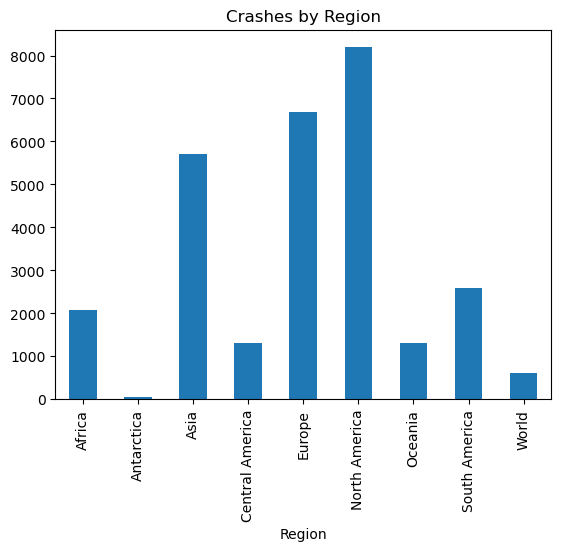

In [11]:
# Region bar graph
region = plane_data_df.groupby("Region").size()
region.plot(kind='bar', title='Crashes by Region')

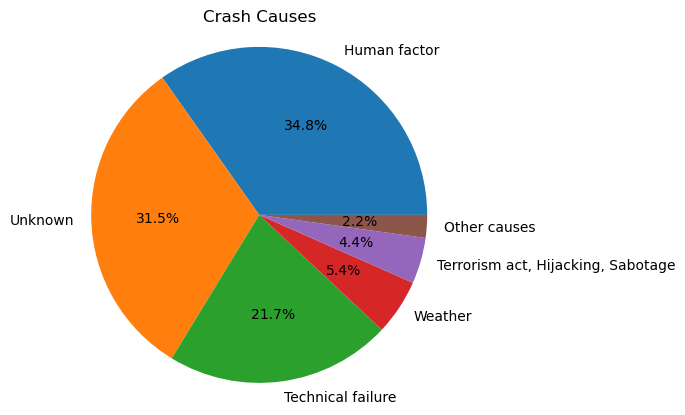

In [19]:
# Crash Cause
Crash_cause = plane_data_df['Crash cause'].value_counts()

plt.pie(Crash_cause, labels=Crash_cause.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Crash Causes')
plt.show()

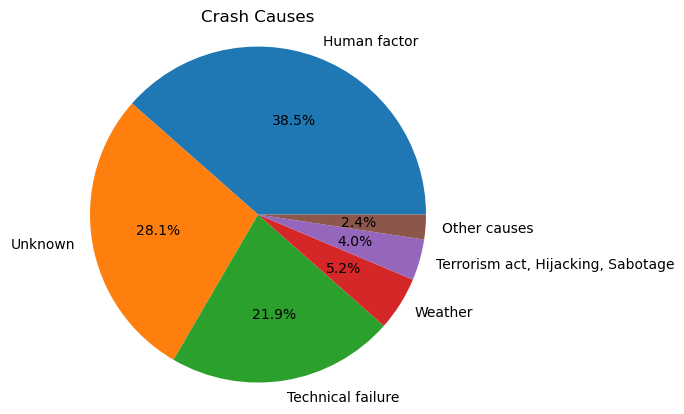

In [21]:
# Crash Cause without military
Crash_cause = plane_filtered['Crash cause'].value_counts()

plt.pie(Crash_cause, labels=Crash_cause.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Crash Causes')
plt.show()

In [26]:
# Remove outliers from 'crew on board'
crew_data = plane_data_df.loc[plane_data_df['Crew on board'] < 30]
crew_data.head()

,Date,Time,Aircraft,Operator,Registration,Flight phase,Flight type,Survivors,Crash site,Schedule,...,Country,Region,Crew on board,Crew fatalities,Pax on board,PAX fatalities,Other fatalities,Total fatalities,Circumstances,Crash cause
0,1918-05-02,NaN,De Havilland DH.4,United States Signal Corps - USSC,AS-32084,Takeoff (climb),Test,No,Airport (less than 10 km from airport),Dayton - Dayton,...,United States of America,North America,2.0,2.0,0.0,0.0,0.0,2,The single engine airplane departed Dayton-McC...,Technical failure
1,1918-06-08,NaN,Handley Page V/1500,Handley Page Aircraft Company Ltd,E4104,Takeoff (climb),Test,Yes,Airport (less than 10 km from airport),Cricklewood - Cricklewood,...,United Kingdom,Europe,6.0,5.0,0.0,0.0,0.0,5,"Assembled at Cricklewood Airfield in May 1918,...",Technical failure
2,1918-06-11,NaN,Avro 504,Royal Air Force - RAF,A8544,Flight,Training,Yes,"Plain, Valley",Abukir - Abukir,...,Egypt,Africa,2.0,1.0,0.0,0.0,0.0,1,The single engine aircraft was completing a lo...,Unknown
3,1918-06-19,NaN,De Havilland DH.4,United States Signal Corps - USSC,AS-32098,Flight,Military,No,Airport (less than 10 km from airport),Wright Patterson AFB-Wright Patterson AFB,...,United States of America,North America,1.0,1.0,0.0,0.0,0.0,1,"Lt. Frank Stuart Patterson, son and nephew of ...",Technical failure
5,1918-07-14,NaN,Fairey III,Marine Aeroplane Depot,N2851,Landing (descent or approach),Delivery,No,Airport (less than 10 km from airport),Isle of Grain - Usworth - Glasgow,...,United Kingdom,Europe,1.0,1.0,0.0,0.0,0.0,1,The pilot departed Isle of Grain on a delivery...,Unknown


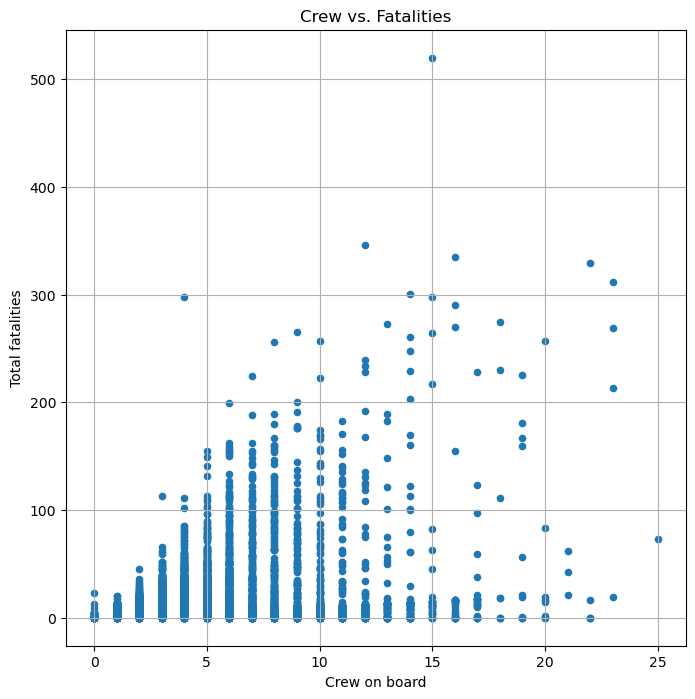

In [28]:
# Crew on board vs total fatalities scatter plot
crew_data.plot(kind='scatter', x='Crew on board', y='Total fatalities', grid='True', figsize=(8,8), title='Crew vs. Fatalities')
plt.show()

Correlation Coefficient: 0.37654740403231135


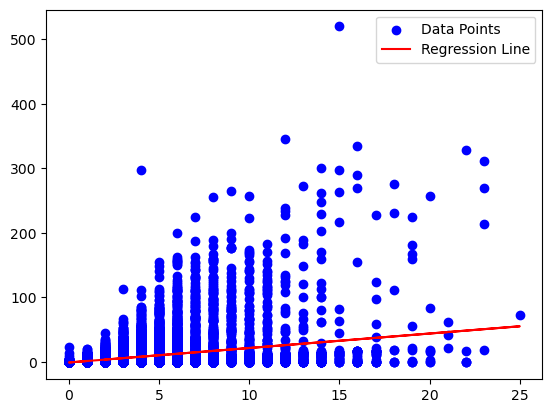

In [30]:
# Correlation and Regression
correlation = crew_data['Crew on board'].corr(crew_data['Total fatalities'])
print(f"Correlation Coefficient: {correlation}")

x = crew_data['Crew on board']
y = crew_data['Total fatalities']
slope, intercept, _, _, _ = linregress(x,y)

plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, slope*x + intercept, color='red', label='Regression Line')
plt.legend()
plt.show()

In [32]:
# Remove outliers from 'crew on board' without military
crew_data_filtered = plane_filtered.loc[plane_data_df['Crew on board'] < 30]
crew_data_filtered.head()

,Date,Time,Aircraft,Operator,Registration,Flight phase,Flight type,Survivors,Crash site,Schedule,...,Country,Region,Crew on board,Crew fatalities,Pax on board,PAX fatalities,Other fatalities,Total fatalities,Circumstances,Crash cause
0,1918-05-02,NaN,De Havilland DH.4,United States Signal Corps - USSC,AS-32084,Takeoff (climb),Test,No,Airport (less than 10 km from airport),Dayton - Dayton,...,United States of America,North America,2.0,2.0,0.0,0.0,0.0,2,The single engine airplane departed Dayton-McC...,Technical failure
1,1918-06-08,NaN,Handley Page V/1500,Handley Page Aircraft Company Ltd,E4104,Takeoff (climb),Test,Yes,Airport (less than 10 km from airport),Cricklewood - Cricklewood,...,United Kingdom,Europe,6.0,5.0,0.0,0.0,0.0,5,"Assembled at Cricklewood Airfield in May 1918,...",Technical failure
2,1918-06-11,NaN,Avro 504,Royal Air Force - RAF,A8544,Flight,Training,Yes,"Plain, Valley",Abukir - Abukir,...,Egypt,Africa,2.0,1.0,0.0,0.0,0.0,1,The single engine aircraft was completing a lo...,Unknown
5,1918-07-14,NaN,Fairey III,Marine Aeroplane Depot,N2851,Landing (descent or approach),Delivery,No,Airport (less than 10 km from airport),Isle of Grain - Usworth - Glasgow,...,United Kingdom,Europe,1.0,1.0,0.0,0.0,0.0,1,The pilot departed Isle of Grain on a delivery...,Unknown
6,1918-07-18,NaN,De Havilland DH.6,Royal Air Force - RAF,B3087,Flight,Training,No,Airport (less than 10 km from airport),Seaton Carew - Seaton Carew,...,United Kingdom,Europe,2.0,2.0,0.0,0.0,0.0,2,The crew was completing a local training fligh...,Unknown


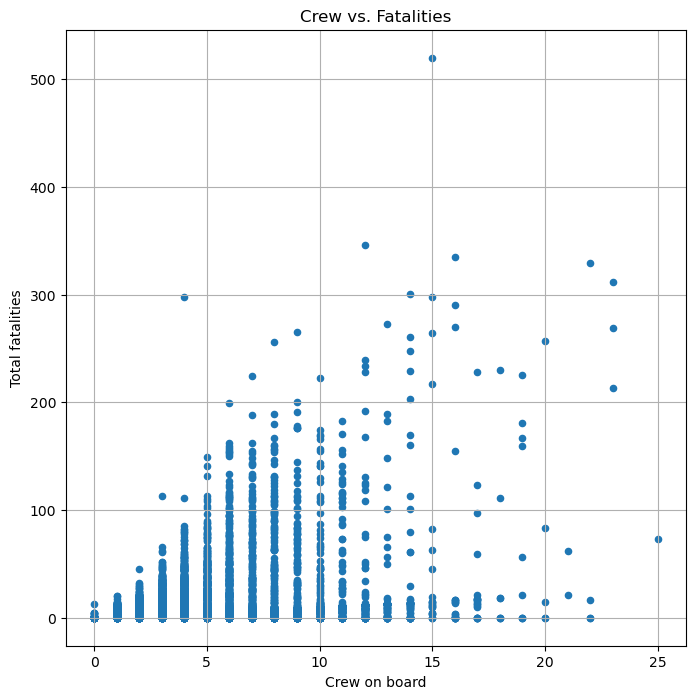

In [34]:
# Crew on board vs total fatalities scatter plot without military
crew_data_filtered.plot(kind='scatter', x='Crew on board', y='Total fatalities', grid='True', figsize=(8,8), title='Crew vs. Fatalities')
plt.show()

Correlation Coefficient: 0.38859159074542104


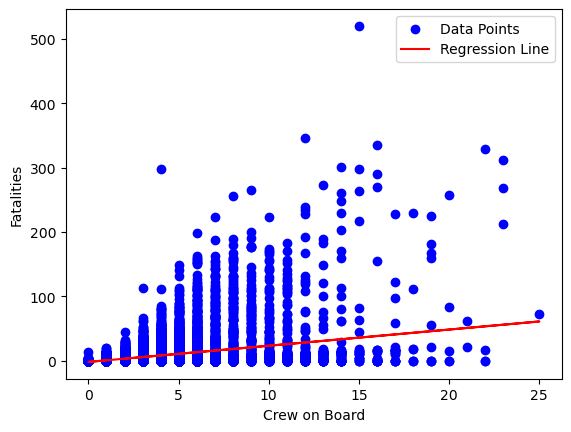

In [38]:
# Correlation and Regression
correlation = crew_data_filtered['Crew on board'].corr(crew_data_filtered['Total fatalities'])
print(f"Correlation Coefficient: {correlation}")

x = crew_data_filtered['Crew on board']
y = crew_data_filtered['Total fatalities']
slope, intercept, _, _, _ = linregress(x,y)

plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, slope*x + intercept, color='red', label='Regression Line')
plt.xlabel('Crew on Board')
plt.ylabel('Fatalities')
plt.legend()
plt.show()

In [73]:
# Import second database
aircraft_data = pd.read_csv('baaa-aircraft-dataset.csv')

aircraft_df = pd.DataFrame(aircraft_data)
aircraft_df

,Date,Operator,A/C Type,Location,Crew on board,Crew fatalities,PAX on board,PAX fatalities,Total on board,Total fatalities,Flight Type,Flight Phase,Continent,Year,Probable Causes
0,27-Apr-20,Compagnie Generale TRANSAERIENNE,Nieuport-Delage NiD-30,"The Channel, All World",1,1,0,0.0,1,1,Postal,Flight,Europe,1920,Unknown Reasons
1,15-Sep-23,Armée De L'Air,Lioré-et-Olivier LeO H-13,"Mediterranean Sea, All World",0,0,0,0.0,0,0,Scheduled Revenue Flight,Flight,Europe,1923,Technical Factors
2,24-Apr-24,KLM,Fokker F3,"North Sea, All World",1,1,2,2.0,3,3,Scheduled Revenue Flight,Flight,Europe,1924,Technical Factors
3,21-Aug-24,Regia Aeronautica,Dornier DO J wal,"Atlantic Ocean, All World",5,0,0,0.0,5,0,Private,Flight,North America,1924,Technical Factors
4,9-Feb-25,Compagnie Générale d'Enterprises Aéronatiques,Lioré-et-Olivier LeO H-13,"Mediterranean Sea, All World",2,0,0,0.0,2,0,Postal,Flight,Africa,1925,Technical Factors
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
587,25-Oct-18,Bulldog Flying Club,Piper PA-31 Cheyenne,"Atlantic Ocean, All World",2,2,3,3.0,5,5,Private,Flight,North America,2018,Unknown Reasons
588,6-Dec-18,USMC,Lockheed C-130 Hercules,"Pacific Ocean, All World",5,5,0,0.0,5,5,Refuelling,Flight,Asia,2018,Crashing The Other Objects
589,24-May-19,Hypo Consulting,Cessna 560 Citation Encore,"Atlantic Ocean, All World",1,1,0,0.0,1,1,Private,Flight,North America,2019,Unknown Reasons
590,9-Dec-19,FUERZA AEREA DE CHILE,Lockheed C-130 Hercules,"Drake Passage, All World",17,17,21,21.0,38,38,Military,Flight,Antartica,2019,Unknown Reasons


In [83]:
total_board_accidents = aircraft_df.groupby('Total on board').size()
total_board_accidents_df = pd.DataFrame(total_board_accidents, columns=['Plane Accidents'])
total_board_accidents_df = total_board_accidents_df.reset_index()
total_board_accidents_df

,Total on board,Plane Accidents
0,0,28
1,1,32
2,2,48
3,3,47
4,4,55
5,5,50
6,6,42
7,7,40
8,8,37
9,9,27


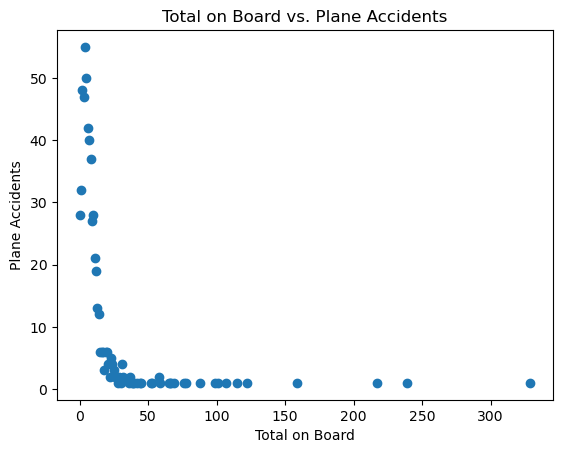

In [95]:
# scatter plot total on board vs accidents
plt.scatter(total_board_accidents_df['Total on board'], total_board_accidents_df['Plane Accidents'])
plt.title('Total on Board vs. Plane Accidents')
plt.xlabel('Total on Board')
plt.ylabel('Plane Accidents')
plt.grid=True
plt.show()

Correlation Coefficient: -0.4248934017418027


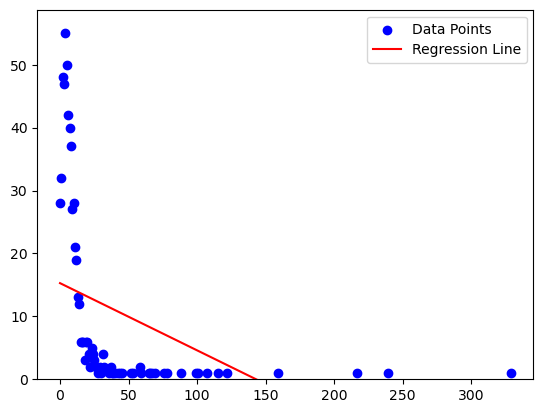

In [105]:
# Correlation and Regression
correlation = total_board_accidents_df['Total on board'].corr(total_board_accidents_df['Plane Accidents'])
print(f"Correlation Coefficient: {correlation}")

x = total_board_accidents_df['Total on board']
y = total_board_accidents_df['Plane Accidents']
slope, intercept, _, _, _ = linregress(x,y)

plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, slope*x + intercept, color='red', label='Regression Line')
plt.xlabel=('Total on Board')
plt.ylabel=('Plane Accidents')
plt.ylim(0, None)
plt.legend()
plt.show()

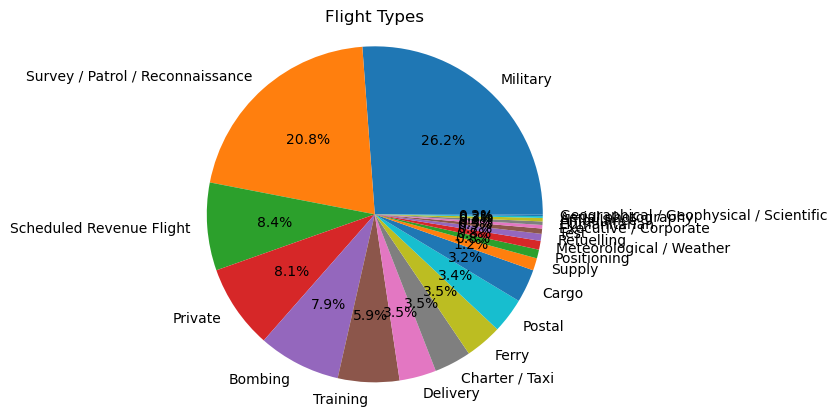

In [89]:
# Flight type pie graph
flight_type = aircraft_data['Flight Type'].value_counts()

plt.pie(flight_type, labels=flight_type.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Flight Types')
plt.show()


In [107]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import datetime
import hvplot.pandas
import geoviews as gv
import api_keys
# import holoviews as hv
import hvplot

ModuleNotFoundError: No module named 'api_keys'

In [110]:
df= pd.read_csv('Plane Crashes.csv')
df

,Date,Time,Aircraft,Operator,Registration,Flight phase,Flight type,Survivors,Crash site,Schedule,...,Country,Region,Crew on board,Crew fatalities,Pax on board,PAX fatalities,Other fatalities,Total fatalities,Circumstances,Crash cause
0,1918-05-02,NaN,De Havilland DH.4,United States Signal Corps - USSC,AS-32084,Takeoff (climb),Test,No,Airport (less than 10 km from airport),Dayton - Dayton,...,United States of America,North America,2.0,2.0,0.0,0.0,0.0,2,The single engine airplane departed Dayton-McC...,Technical failure
1,1918-06-08,NaN,Handley Page V/1500,Handley Page Aircraft Company Ltd,E4104,Takeoff (climb),Test,Yes,Airport (less than 10 km from airport),Cricklewood - Cricklewood,...,United Kingdom,Europe,6.0,5.0,0.0,0.0,0.0,5,"Assembled at Cricklewood Airfield in May 1918,...",Technical failure
2,1918-06-11,NaN,Avro 504,Royal Air Force - RAF,A8544,Flight,Training,Yes,"Plain, Valley",Abukir - Abukir,...,Egypt,Africa,2.0,1.0,0.0,0.0,0.0,1,The single engine aircraft was completing a lo...,Unknown
3,1918-06-19,NaN,De Havilland DH.4,United States Signal Corps - USSC,AS-32098,Flight,Military,No,Airport (less than 10 km from airport),Wright Patterson AFB-Wright Patterson AFB,...,United States of America,North America,1.0,1.0,0.0,0.0,0.0,1,"Lt. Frank Stuart Patterson, son and nephew of ...",Technical failure
4,1918-06-24,NaN,Breguet 14,French Air Force - Armée de l'Air,AS-4130,Landing (descent or approach),Military,Yes,NaN,NaN,...,France,Europe,NaN,0.0,NaN,0.0,0.0,0,The aircraft crashed iupon landing somewhere i...,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28531,2022-05-20,NaN,Embraer EMB-110 Bandeirante,Sales Serviços Aéreos,PT-SHN,Landing (descent or approach),Cargo,Yes,Airport (less than 10 km from airport),Jundiaí – Eldorado do Sul,...,Brazil,South America,2.0,0.0,0.0,0.0,0.0,0,The airplane departed Jundiaí on a cargo fligh...,Unknown
28532,2022-05-23,18H 29M 0S,Piper PA-61 Aerostar (Ted Smith 601),Raul Ignacion Posada,N66CG,Flight,Private,No,"Plain, Valley",Celaya - Durango,...,Mexico,Central America,1.0,1.0,1.0,1.0,0.0,2,While approaching Durango Airport on a flight ...,Unknown
28533,2022-05-24,15H 40M 0S,De Havilland DHC-3 Otter,Yakutat Coastal Airlines,N703TH,Landing (descent or approach),Charter/Taxi (Non Scheduled Revenue Flight),Yes,Airport (less than 10 km from airport),Yakutat – Dry Bay,...,United States of America,North America,1.0,0.0,3.0,0.0,0.0,0,The single engine airplane departed Yakutat on...,Unknown
28534,2022-05-29,10H 7M 0S,De Havilland DHC-6 Twin Otter,Tara Air,9N-AET,Flight,Scheduled Revenue Flight,No,Mountains,Pokhara – Jomsom,...,Nepal,Asia,3.0,3.0,19.0,19.0,0.0,22,The twin engine airplane departed Pokhara City...,Human factor


In [112]:
# Convert 'date' to datetime format if it's not already
df['Date'] = pd.to_datetime(df['Date'])

# Create a new column for the decade
df['Decade'] = (df['Date'].dt.year // 10) * 10

In [114]:
df= df[['Date', 'Time' ,'Aircraft','Flight phase',
       'Flight type', 'Survivors', 'Crash site', 'Schedule', 'MSN', 'YOM',
       'Crash location', 'Country', 'Region', 'Crew on board', 'Pax on board',
       'Total fatalities', 'Crash cause', 'Decade']]
df

,Date,Time,Aircraft,Flight phase,Flight type,Survivors,Crash site,Schedule,MSN,YOM,Crash location,Country,Region,Crew on board,Pax on board,Total fatalities,Crash cause,Decade
0,1918-05-02,NaN,De Havilland DH.4,Takeoff (climb),Test,No,Airport (less than 10 km from airport),Dayton - Dayton,NaN,NaN,Dayton-McCook Field Ohio,United States of America,North America,2.0,0.0,2,Technical failure,1910
1,1918-06-08,NaN,Handley Page V/1500,Takeoff (climb),Test,Yes,Airport (less than 10 km from airport),Cricklewood - Cricklewood,NaN,1918.0,Cricklewood London Metropolis,United Kingdom,Europe,6.0,0.0,5,Technical failure,1910
2,1918-06-11,NaN,Avro 504,Flight,Training,Yes,"Plain, Valley",Abukir - Abukir,NaN,NaN,Abukir (Abu Qir) Alexandria,Egypt,Africa,2.0,0.0,1,Unknown,1910
3,1918-06-19,NaN,De Havilland DH.4,Flight,Military,No,Airport (less than 10 km from airport),Wright Patterson AFB-Wright Patterson AFB,NaN,NaN,Wright-Patterson AFB (Dayton) Ohio,United States of America,North America,1.0,0.0,1,Technical failure,1910
4,1918-06-24,NaN,Breguet 14,Landing (descent or approach),Military,Yes,NaN,NaN,NaN,NaN,France All France,France,Europe,NaN,NaN,0,Unknown,1910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28531,2022-05-20,NaN,Embraer EMB-110 Bandeirante,Landing (descent or approach),Cargo,Yes,Airport (less than 10 km from airport),Jundiaí – Eldorado do Sul,110-460,1985.0,Eldorado do Sul Rio Grande do Sul,Brazil,South America,2.0,0.0,0,Unknown,2020
28532,2022-05-23,18H 29M 0S,Piper PA-61 Aerostar (Ted Smith 601),Flight,Private,No,"Plain, Valley",Celaya - Durango,61-0277-061,1976.0,Durango Durango,Mexico,Central America,1.0,1.0,2,Unknown,2020
28533,2022-05-24,15H 40M 0S,De Havilland DHC-3 Otter,Landing (descent or approach),Charter/Taxi (Non Scheduled Revenue Flight),Yes,Airport (less than 10 km from airport),Yakutat – Dry Bay,456,1965.0,Dry Bay Alaska,United States of America,North America,1.0,3.0,0,Unknown,2020
28534,2022-05-29,10H 7M 0S,De Havilland DHC-6 Twin Otter,Flight,Scheduled Revenue Flight,No,Mountains,Pokhara – Jomsom,619,1979.0,Shikha Dhawalagiri,Nepal,Asia,3.0,19.0,22,Human factor,2020


TypeError: 'str' object is not callable

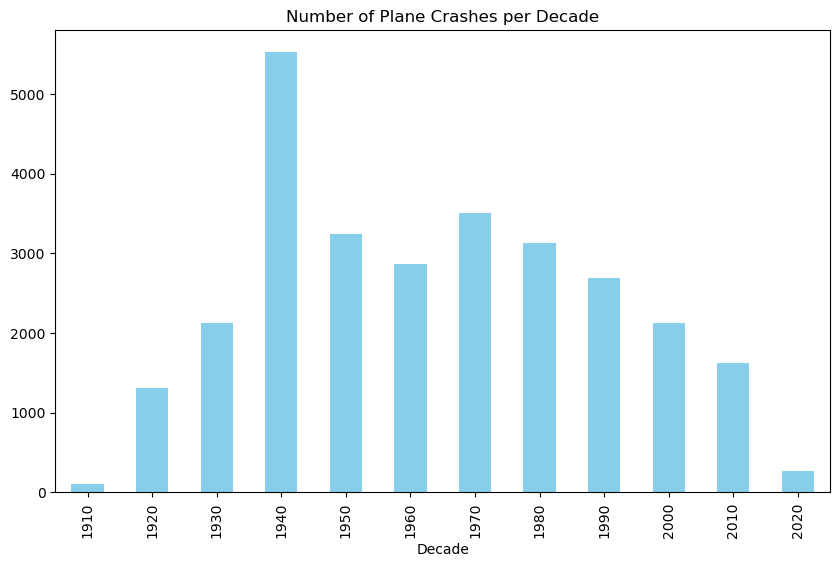

In [116]:
decades=df.groupby('Decade')['Date'].count()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
decades.plot(kind='bar', color='skyblue')
plt.title('Number of Plane Crashes per Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [118]:
# unique countries in a list
countries = df['Country'].unique().tolist() 
countries

['United States of America',
 'United Kingdom',
 'Egypt',
 'France',
 'Portugal',
 'Greece',
 'Slovakia',
 'Italy',
 'Belgium',
 'Ireland',
 'Czech Republic',
 'Mexico',
 'Germany',
 'Sudan',
 'South Africa',
 'Malaysia',
 'Tanzania',
 'Zimbabwe',
 'Switzerland',
 'Spain',
 'World',
 'Colombia',
 'Sweden',
 'Indonesia',
 'Cuba',
 'Norway',
 'Philippines',
 'Canada',
 'New Zealand',
 'Brazil',
 'Poland',
 'Iraq',
 'Australia',
 'Netherlands',
 'Denmark',
 'Pakistan',
 'Chile',
 'China',
 'Turkey',
 'India',
 'Morocco',
 'Hungary',
 'Russia',
 'Lithuania',
 'Romania',
 'Niger',
 'Georgia',
 'Mauritania',
 'Estonia',
 'Algeria',
 'Uruguay',
 'Bolivia',
 'Western Sahara',
 'Kenya',
 'Venezuela',
 'Ukraine',
 'Dominican Republic',
 'Guyana',
 'Austria',
 'Senegal',
 'Finland',
 'Papua New Guinea',
 'Argentina',
 'Bulgaria',
 'Japan',
 'Panama',
 'Bahamas',
 'Tunisia',
 'Zambia',
 'Puerto Rico',
 'Costa Rica',
 'Myanmar',
 'Democratic Republic of Congo',
 'South Sudan',
 'Paraguay',
 'Nicara

In [ ]:
# Your OpenWeather API Key
api_key = api_keys.weather_api_key

results = []

# Function to get latitude and longitude using OpenWeather API
def get_lat_lon(country, api_key):
    url = f'http://api.openweathermap.org/geo/1.0/direct?q={country}&limit=1&appid={api_key}'
    response = requests.get(url).json()
    if response:
        return response[0]['lat'], response[0]['lon']
    else:
        return None, None

# Loop through the countries list
for idx, country in enumerate(countries):
    print(f"Processing {idx + 1}/{len(countries)}: {country}")
    lat, lon = get_lat_lon(country, api_key)
    if lat is not None and lon is not None:
        results.append({'Country': country, 'Latitude': lat, 'Longitude': lon})

# Convert the results to a DataFrame
df_countries = pd.DataFrame(results)

df_countries

In [ ]:
# Plotting the data on a map using hvplot
map_plot = df_countries.hvplot.points('Longitude', 'Latitude', geo=True, tiles='OSM', size=10, color='red',
                            hover_cols=['Country'], title='Plane Crash Locations')

# Show the plot
map_plot

TypeError: 'str' object is not callable

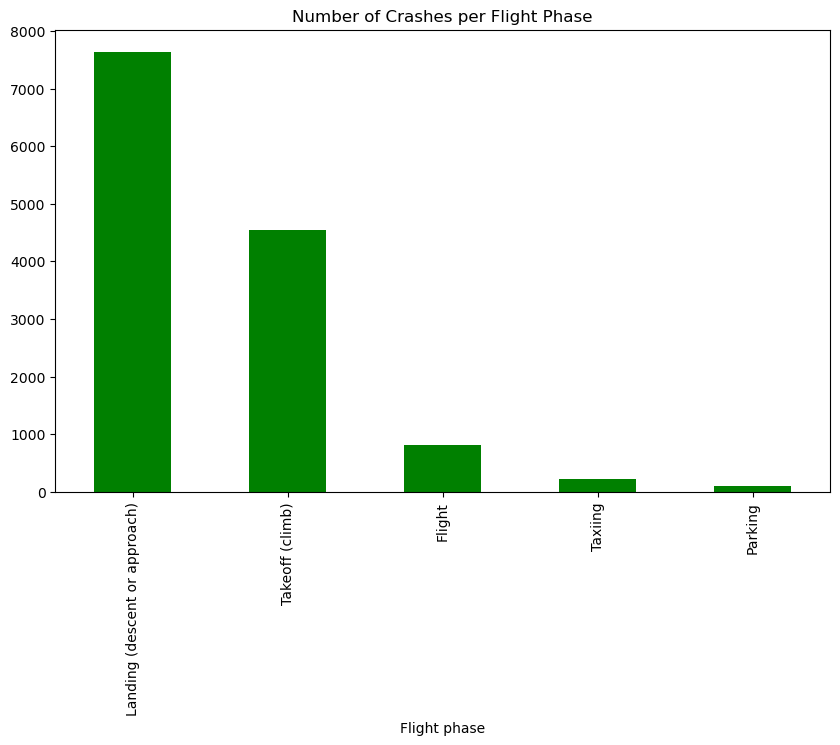

In [120]:
# Crashes by flight phase visualization
phases = df.loc[df['Crash site'] == 'Airport (less than 10 km from airport)']['Flight phase'].value_counts()
plt.figure(figsize=(10, 6))
phases.plot(kind='bar', color='green')
plt.title('Number of Crashes per Flight Phase')
plt.xlabel('Phase')
plt.ylabel('Total Crashes')
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig('plane_crashes_per_phase.png', format='png', dpi=300)
plt.show()

In [9]:
# Study data files
abridged_crashes_path = 'baaa-aircraft-dataset.csv'



abridged_crashes_metadata = pd.read_csv(abridged_crashes_path)

crash_data_abridged=pd.merge(abridged_crashes_metadata,abridged_crashes_metadata,how="left")
# Display the data table for preview
crash_data_abridged.head()

,Date,Operator,A/C Type,Location,Crew on board,Crew fatalities,PAX on board,PAX fatalities,Total on board,Total fatalities,Flight Type,Flight Phase,Continent,Year,Probable Causes
0,27-Apr-20,Compagnie Generale TRANSAERIENNE,Nieuport-Delage NiD-30,"The Channel, All World",1,1,0,0.0,1,1,Postal,Flight,Europe,1920,Unknown Reasons
1,15-Sep-23,Armée De L'Air,Lioré-et-Olivier LeO H-13,"Mediterranean Sea, All World",0,0,0,0.0,0,0,Scheduled Revenue Flight,Flight,Europe,1923,Technical Factors
2,24-Apr-24,KLM,Fokker F3,"North Sea, All World",1,1,2,2.0,3,3,Scheduled Revenue Flight,Flight,Europe,1924,Technical Factors
3,21-Aug-24,Regia Aeronautica,Dornier DO J wal,"Atlantic Ocean, All World",5,0,0,0.0,5,0,Private,Flight,North America,1924,Technical Factors
4,9-Feb-25,Compagnie Générale d'Enterprises Aéronatiques,Lioré-et-Olivier LeO H-13,"Mediterranean Sea, All World",2,0,0,0.0,2,0,Postal,Flight,Africa,1925,Technical Factors


In [11]:
# Study data files
Plane_Crashes_crewstats = "Plane_Crashes_crewstats.csv"



crew_crashes_metadata = pd.read_csv(Plane_Crashes_crewstats)

crew_crashes_metadata=pd.merge(crew_crashes_metadata,crew_crashes_metadata,how="left")
# Display the data table for preview
crew_crashes_metadata.head()

,Date,Time,Aircraft,Operator,Registration,Flight phase,Flight type,Survivors,Crash site,Schedule,...,Pax on board,PAX fatalities,Other fatalities,Total fatalities,Crew Fatality Rate,Passenger Fatality Rate,Circumstances,Crash cause,Age of Plane,crash year
0,5/2/1918,NaN,De Havilland DH.4,United States Signal Corps - USSC,AS-32084,Takeoff (climb),Test,No,Airport (less than 10 km from airport),Dayton - Dayton,...,0,0,0.0,2,1.000000,0.0,The single engine airplane departed Dayton-McC...,Technical failure,NaN,1918
1,6/8/1918,NaN,Handley Page V/1500,Handley Page Aircraft Company Ltd,E4104,Takeoff (climb),Test,Yes,Airport (less than 10 km from airport),Cricklewood - Cricklewood,...,0,0,0.0,5,0.833333,0.0,"Assembled at Cricklewood Airfield in May 1918,...",Technical failure,0.0,1918
2,6/11/1918,NaN,Avro 504,Royal Air Force - RAF,A8544,Flight,Training,Yes,"Plain, Valley",Abukir - Abukir,...,0,0,0.0,1,0.500000,0.0,The single engine aircraft was completing a lo...,Unknown,NaN,1918
3,6/19/1918,NaN,De Havilland DH.4,United States Signal Corps - USSC,AS-32098,Flight,Military,No,Airport (less than 10 km from airport),Wright Patterson AFB-Wright Patterson AFB,...,0,0,0.0,1,1.000000,0.0,"Lt. Frank Stuart Patterson, son and nephew of ...",Technical failure,NaN,1918
4,7/14/1918,NaN,Fairey III,Marine Aeroplane Depot,N2851,Landing (descent or approach),Delivery,No,Airport (less than 10 km from airport),Isle of Grain - Usworth - Glasgow,...,0,0,0.0,1,1.000000,0.0,The pilot departed Isle of Grain on a delivery...,Unknown,NaN,1918


In [13]:
# Find average fatalities per year
average_fatalities_per_year = crew_crashes_metadata.groupby('crash year')['Crew fatalities'].mean().reset_index()

# Rename the columns for clarity
average_fatalities_per_year.columns = ['crash year', 'Average Crew fatalities']

print(average_fatalities_per_year)

     crash year  Average Crew fatalities
0          1918                 1.263158
1          1919                 0.400000
2          1920                 0.456693
3          1921                 0.413043
4          1922                 0.641509
..          ...                      ...
100        2018                 1.206107
101        2019                 1.110345
102        2020                 0.946903
103        2021                 1.230088
104        2022                 0.897436

[105 rows x 2 columns]


The correlation between between the crash date and the number of crew member deaths is -0.08


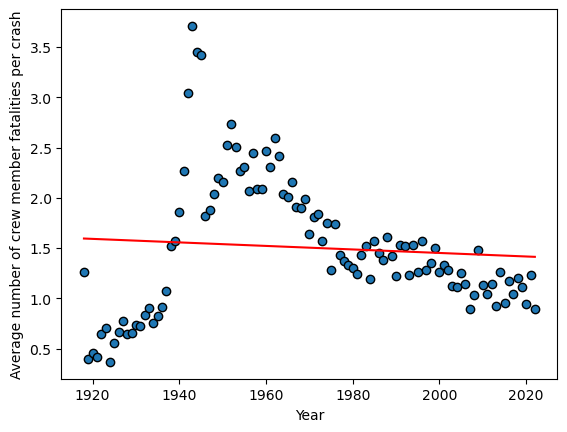

In [19]:
#PASSENGER AND CREW FATALITY RATE OVER TIME
# Calculate the correlation coefficient and linear regression model 

crewcorrelation =st.pearsonr(average_fatalities_per_year["crash year"],average_fatalities_per_year["Average Crew fatalities"])
print(f"The correlation between between the crash date and the number of crew member deaths is {round(crewcorrelation[0],2)}")

# Add the linear regression equation and line to plot

(slope, intercept,rvalue, pvalue, stderr)=st.linregress(average_fatalities_per_year["crash year"],average_fatalities_per_year["Average Crew fatalities"])
regress_values=crew_crashes_metadata["crash year"]* slope + intercept


plt.scatter(average_fatalities_per_year["crash year"],average_fatalities_per_year["Average Crew fatalities"],edgecolors="k")
plt.plot(average_fatalities_per_year['crash year'], slope * average_fatalities_per_year['crash year'] + intercept, color='red', label='Regression line')
plt.xlabel("Year")
plt.xlabel("Year")
plt.ylabel("Average number of crew member fatalities per crash")
plt.show()

In [21]:
# Find average pax fatality per year
average_pax_fatalities_per_year = crew_crashes_metadata.groupby('crash year')['PAX fatalities'].mean().reset_index()

# Rename the columns for clarity
average_pax_fatalities_per_year.columns = ['crash year', 'Average PAX fatalities']

print(average_pax_fatalities_per_year)

     crash year  Average PAX fatalities
0          1918                0.263158
1          1919                0.225000
2          1920                0.149606
3          1921                0.115942
4          1922                0.349057
..          ...                     ...
100        2018                6.709924
101        2019                2.731034
102        2020                3.292035
103        2021                2.380531
104        2022                4.820513

[105 rows x 2 columns]


The correlation between between the crash year and number of passenger fatalities is 0.65


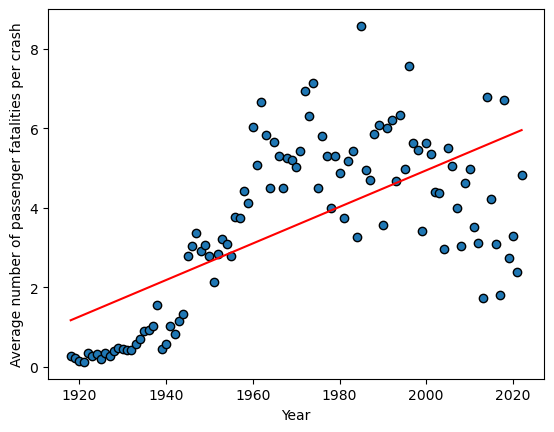

In [23]:
#PASSENGER AND CREW FATALITY RATE OVER TIME
# Calculate the correlation coefficient and linear regression model 
paxcorrelation =st.pearsonr(average_pax_fatalities_per_year["crash year"],average_pax_fatalities_per_year["Average PAX fatalities"])
print(f"The correlation between between the crash year and number of passenger fatalities is {round(paxcorrelation[0],2)}")
(slope, intercept,rvalue, pvalue, stderr)=st.linregress(average_pax_fatalities_per_year["crash year"],average_pax_fatalities_per_year["Average PAX fatalities"])
regress_values=crew_crashes_metadata["crash year"]* slope + intercept




plt.scatter(average_pax_fatalities_per_year["crash year"],average_pax_fatalities_per_year["Average PAX fatalities"],edgecolors="k")
plt.plot(average_pax_fatalities_per_year['crash year'], slope * average_pax_fatalities_per_year['crash year'] + intercept, color='red', label='Regression line')
plt.xlabel("Year")
plt.ylabel("Average number of passenger fatalities per crash")
plt.show()